<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/mistral_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using Mistral Pixtral-12B model for image reasoning

In this notebook, we show how to use MistralAI MultiModal LLM class/abstraction for image understanding/reasoning.

We demonstrate following functions that are supported for MistralAI Pixtral Multimodal LLM:
* `complete` (both sync and async): for a single prompt and list of images
* `stream complete` (both sync and async): for steaming output of complete

In [ ]:
%pip install llama-index-multi-modal-llms-mistralai
%pip install matplotlib

In [ ]:
import os
from IPython.display import Markdown, display

os.environ[
    "MISTRAL_API_KEY"
] = "<YOUR API KEY>"  # Your MistralAI API token here

## Initialize `MistralAIMultiModal`

## 

In [ ]:
from llama_index.multi_modal_llms.mistralai import MistralAIMultiModal

mistralai_mm_llm = MistralAIMultiModal(
    model="pixtral-12b-2409", max_new_tokens=300
)

## Load Images from URLs

In [ ]:
from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


image_urls = [
    "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg",
    "https://cdn.statcdn.com/Infographic/images/normal/30322.jpeg",
]

image_documents = load_image_urls(image_urls)

### First Image

https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg


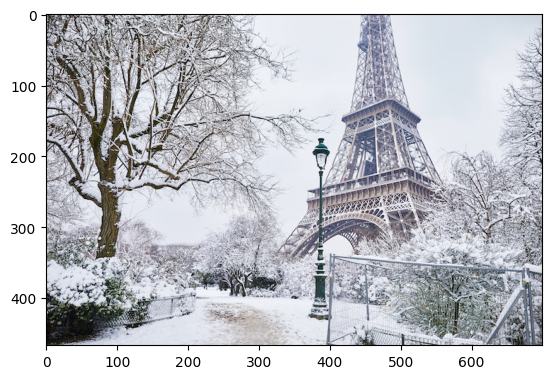

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
img_response = requests.get(image_urls[0], headers=headers)

print(image_urls[0])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Second Image

https://cdn.statcdn.com/Infographic/images/normal/30322.jpeg


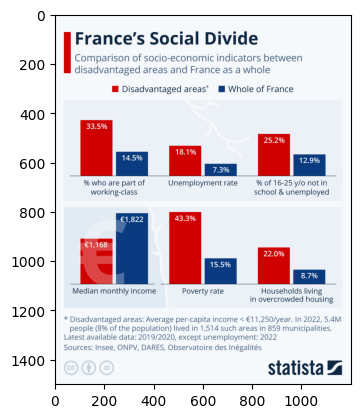

In [ ]:
img_response = requests.get(image_urls[1], headers=headers)

print(image_urls[1])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = mistralai_mm_llm.complete(
    prompt="Describe the images as an alternative text in a few words",
    image_documents=image_documents,
)

In [ ]:
display(Markdown(f"{complete_response}"))

The image consists of two distinct parts. The first part is a photograph of the Eiffel Tower in Paris, France, covered in snow. The Eiffel Tower stands prominently in the center, surrounded by snow-covered trees and a pathway. The scene is serene and picturesque, capturing the beauty of the iconic landmark in a winter setting.

The second part is an infographic titled "France's Social Divide." It compares socio-economic indicators between disadvantaged areas and the whole of France. The indicators include the percentage of people part of the working class, unemployment rate, percentage of 16-25-year-olds not in school and unemployed, median monthly income, poverty rate, and households living in overcrowded housing. The data shows significant disparities between disadvantaged areas and the rest of France, with disadvantaged areas having higher unemployment rates, lower median monthly income, higher poverty rates, and more households living in overcrowded housing.

Overall, the image juxtaposes the beauty of the Eiffel Tower in winter with a detailed analysis of socio-economic inequalities in France.

### Steam Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = mistralai_mm_llm.stream_complete(
    prompt="give me more context for this images in a few words",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.delta, end="")

The image consists of two main parts: a photograph and an infographic. 

1. **Photograph**:
   - The photograph depicts the Eiffel Tower in Paris, France, covered in snow. The scene is serene with snow-covered trees and a pathway leading towards the Eiffel Tower. A traditional street lamp is visible in the foreground, adding to the picturesque winter setting.

2. **Infographic**:
   - The infographic is titled "France's Social Divide" and compares socio-economic indicators between disadvantaged areas and the whole of France.
   - **Indicators and Data**:
     - **% who are part of working-class**: 33.5% in disadvantaged areas vs. 14.5% in the whole of France.
     - **Unemployment rate**: 18.1% in disadvantaged areas vs. 7.3% in the whole of France.
     - **% of 16-25 y/o not in school & unemployed**: 25.2% in disadvantaged areas vs. 12.9% in the whole of France.
     - **Median monthly income**: €1,168 in disadvantaged areas vs. €1,822 in the whole of France.
     - **Poverty rate**:

### Async Complete

In [ ]:
response_acomplete = await mistralai_mm_llm.acomplete(
    prompt="Describe the images as an alternative text in a few words",
    image_documents=image_documents,
)

In [ ]:
display(Markdown(f"{response_acomplete}"))

The image consists of two distinct parts. The first part is a photograph of the Eiffel Tower in Paris, France, covered in snow. The Eiffel Tower stands prominently in the center, surrounded by snow-covered trees and a pathway. The scene is serene and picturesque, capturing the beauty of a winter day in Paris.

The second part is an infographic titled "France's Social Divide." It compares socio-economic indicators between disadvantaged areas and the whole of France. The indicators include the percentage of people part of the working class, unemployment rate, percentage of 16-25-year-olds not in school and unemployed, median monthly income, poverty rate, and households living in overcrowded housing. The data shows significant disparities between disadvantaged areas and the rest of France. For instance, disadvantaged areas have a higher percentage of people part of the working class (33.5% vs. 14.5%), a higher unemployment rate (18.1% vs. 7.3%), and a higher percentage of young people not in school and unemployed (25.2% vs. 12.9%). The median monthly income is lower in disadvantaged areas (€1,168 vs. €1,822), and the poverty rate is higher (43.3% vs. 15.5%). Additionally, 22.0% of households in disadvantaged areas live in overcrowded housing compared to 8

### Async Steam Complete

In [ ]:
response_astream_complete = await mistralai_mm_llm.astream_complete(
    prompt="Describe the images as an alternative text in a few words",
    image_documents=image_documents,
)

In [ ]:
async for delta in response_astream_complete:
    print(delta.delta, end="")

The image consists of two distinct parts. The first part is a photograph of the Eiffel Tower in Paris, France, covered in snow. The tower stands tall in the background, surrounded by snow-covered trees and a pathway leading towards it. The scene is serene and picturesque, capturing the beauty of winter in Paris.

The second part is an infographic titled "France's Social Divide." This section compares socio-economic indicators between disadvantaged areas and the whole of France. The indicators include the percentage of people who are part of the working class, unemployment rates, the percentage of 16-25-year-olds not in school and unemployed, median monthly income, poverty rates, and the percentage of households living in overcrowded housing. The data shows significant disparities between disadvantaged areas and the rest of France. For example, disadvantaged areas have a higher percentage of people in the working class, higher unemployment rates, and a higher percentage of young people 

## Complete with Two images

In [ ]:
image_urls = [
    "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg",
    "https://assets.visitorscoverage.com/production/wp-content/uploads/2024/04/AdobeStock_626542468-min-1024x683.jpeg",
]

### Lets Inspect the images.

### First Image

https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg


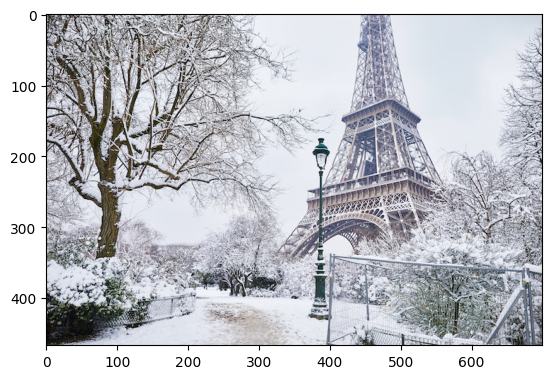

In [ ]:
img_response = requests.get(image_urls[0], headers=headers)

print(image_urls[0])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Second Image

https://assets.visitorscoverage.com/production/wp-content/uploads/2024/04/AdobeStock_626542468-min-1024x683.jpeg


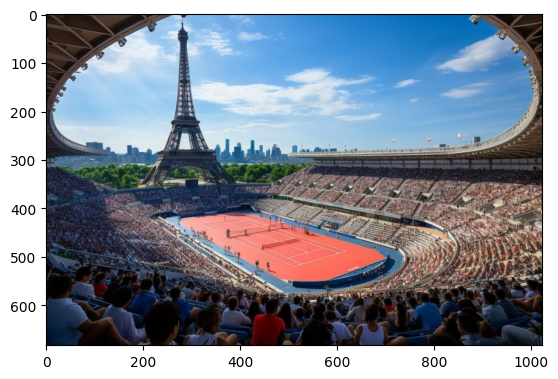

In [ ]:
img_response = requests.get(image_urls[1], headers=headers)

print(image_urls[1])

img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
image_documents_compare = load_image_urls(image_urls)

response_multi = mistralai_mm_llm.complete(
    prompt="What are the differences between two images?",
    image_documents=image_documents_compare,
)

In [ ]:
display(Markdown(f"{response_multi}"))

The first image shows the Eiffel Tower in Paris, France, covered in snow with a snowy landscape around it, while the second image shows a tennis court with a large crowd of people watching a tennis match, and the Eiffel Tower is visible in the background. The first image has a wintery atmosphere with snow-covered trees and a lamppost, while the second image has a sunny atmosphere with a clear blue sky and a large stadium filled with spectators.

##  Load Images from local files

In [ ]:
!wget 'https://www.boredpanda.com/blog/wp-content/uploads/2022/11/interesting-receipts-102-6364c8d181c6a__700.jpg' -O 'receipt.jpg'

--2024-09-24 23:56:24--  https://www.boredpanda.com/blog/wp-content/uploads/2022/11/interesting-receipts-102-6364c8d181c6a__700.jpg
Resolving www.boredpanda.com (www.boredpanda.com)... 52.222.144.111, 52.222.144.94, 52.222.144.47, ...
Connecting to www.boredpanda.com (www.boredpanda.com)|52.222.144.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112631 (110K) [image/jpeg]
Saving to: ‘receipt.jpg’

receipt.jpg         100%[===================>] 109.99K   411KB/s    in 0.3s    

2024-09-24 23:56:25 (411 KB/s) - ‘receipt.jpg’ saved [112631/112631]



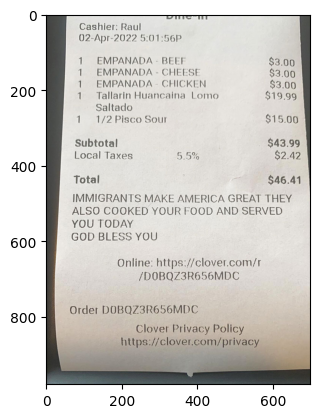

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./receipt.jpg")
plt.imshow(img)

In [ ]:
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader(
    input_files=["./receipt.jpg"]
).load_data()

response = mistralai_mm_llm.complete(
    prompt="Transcribe the text in the image",
    image_documents=image_documents,
)

In [ ]:
display(Markdown(f"{response}"))

Dine-in

Cashier: Raul
02-Apr-2022 5:01:56P

1 EMPANADA - BEEF $3.00
1 EMPANADA - CHEESE $3.00
1 EMPANADA - CHICKEN $3.00
1 Tallarin Huancaína Lomo Saltado $19.99
1 1/2 Pisco Sour $15.00

Subtotal $43.99
Local Taxes 5.5% $2.42

Total $46.41

IMMIGRANTS MAKE AMERICA GREAT THEY
ALSO COOKED YOUR FOOD AND SERVED
YOU TODAY
GOD BLESS YOU

Online: https://clover.com/r
/D0BQZ3R656MDC

Order D0BQZ3R656MDC

Clover Privacy Policy
https://clover.com/privacy